Econometrics5 pg.80 <br>
<br>
안정적 시계열의 필요성 <br>
시계열분석은 서로 종속된 자료로부터 패턴을 찾는 것을 목적으로 함<br>
종속시계열은 통계분석의 신뢰성을 저하시킴<br>
종속성이 크면 클수록 자료로부터 얻을 수 있는 한계정보가 작아지게 됨<br>
종속성이 과도하게 클 경우 (ex. 강한 추세, 강한 순환성 등) (1)대수의 법칙, (2)중심극한정리 등 대표본이론에서 사용되는 통계적 특성이 사라짐<br>
이 경우 통상적인 통계적 추론 불가능<br>
<br>
따라서 시계열분석의 신뢰성을 충족하기 위해서는 지나치게 종속성이 강하지 않은 시계열 자료를 통한 분석 필요<br>
즉, 안정적 시계열이 필요함<br>
시계열을 이용한 예측은 종속성을 가정하므로 iid 자료를 통한 시계열분석은 근본적으로 불가<br>
안정성(stationary, 또는 정상성)의 의미: 시간 변화에 대한 시계열 불변성, 즉 자료의 동일기간에 대한 분포의 동일성<br>
<br>
econometrics5 pg.81 <br>
약안정성/약정상과정(weak stationary process): 일정 기간의 평균, 분산, 공분산이 일정하게 나타나는 확률과정<br>
시계열분석시 약안정성을 만족할 경우 안정성이 충족되는 것으로 간주<br>
약안정성: 모든 시계열의 평균, 분산, 공분산 동일
<br>
<br>
안정성의 검증
- 표본 자기 공분산 함수 (Auto Covariance Function)
- 표본 자기상관 함수(Auto Correlation Function): 자기공분산함수를 분산으로 나누어준 것
<br>
대부분의 시계열은 불안정 시계열(추세, 계절변동, 순환변동)이므로 시계열의 안정성 확보 후 분석 필요


# Econometrics 5 pg. 81, 82

In [1]:
import pandas as pd
data = pd.read_csv('shampoo.csv')

In [2]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


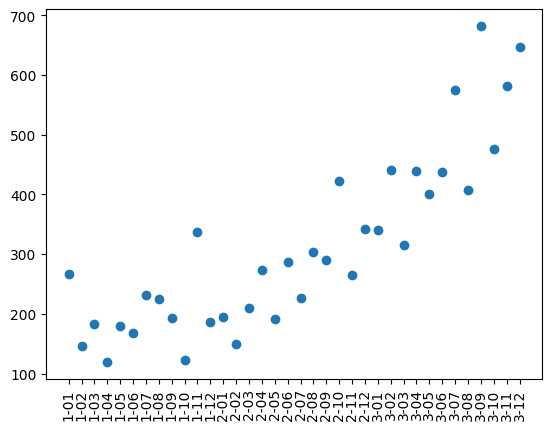

In [3]:
#약안정성조건 만족여부 plotting (pg.82)
# 이 경우는 평균이 점점 커짐 (안정X)
import matplotlib.pyplot as plt
plt.scatter('Month', "Sales", data=data)
plt.xticks(rotation=90)
plt.show()
#(단, 시계열의 경우 자료간 패턴이 존재하는 것은 허용)

In [4]:
#안정성 확보를 위해 이동평균법 적용
data['ma(10)'] = data.Sales.rolling(10).mean()

In [5]:
import numpy as np
data['yhat(10)'] = pd.Series(np.nan).append(data.Sales.rolling(10).mean()).drop(index=\
    data.Sales.index[-1]).reset_index(drop=True)

C:\Users\SH\AppData\Local\Temp\ipykernel_12508\3052061507.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data['yhat(10)'] = pd.Series(np.nan).append(data.Sales.rolling(10).mean()).drop(index=\


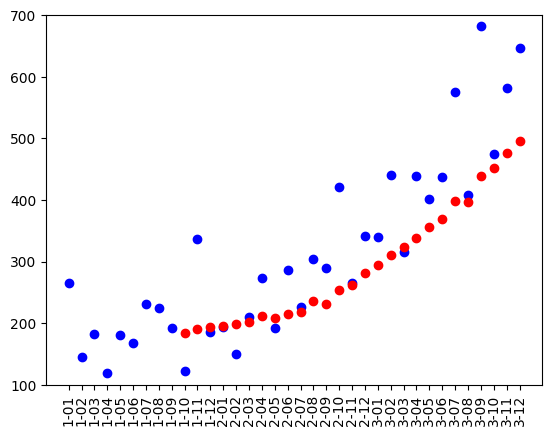

In [6]:
plt.scatter('Month', 'Sales', data=data, c='blue')
plt.scatter('Month', 'ma(10)', data=data, c='red')
plt.xticks(rotation=90)
plt.ylim((100, 700))
plt.show()

In [7]:
#안정성 확보를 위해 지수평활화 적용 (S0=초기 3개 data의 MA (즉, 평균값))

In [8]:
data.Sales[0:3]

0    266.0
1    145.9
2    183.1
Name: Sales, dtype: float64

In [9]:
data.head()

,Month,Sales,ma(10),yhat(10)
0,1-01,266.0,NaN,NaN
1,1-02,145.9,NaN,NaN
2,1-03,183.1,NaN,NaN
3,1-04,119.3,NaN,NaN
4,1-05,180.3,NaN,NaN


In [10]:
import numpy as np
S0 = np.mean(data.Sales[0:3])
S0

198.33333333333334

In [11]:
from statsmodels.tsa.api import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(endog=data.Sales, initial_level=S0, initialization_method='known').fit(smoothing_level=0.05, optimized=False)
data['S(0.05)'] = pd.Series(fit1.fittedvalues)

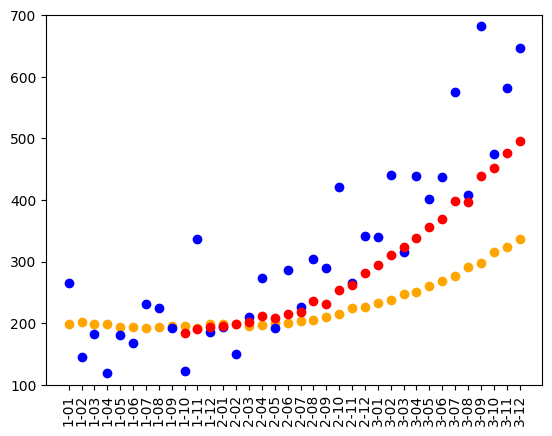

In [12]:
plt.scatter('Month', 'S(0.05)', data=data, c='orange')
plt.scatter('Month', 'Sales', data=data, c='blue')
plt.scatter('Month', 'ma(10)', data=data, c='red')
plt.xticks(rotation=90)
plt.ylim((100, 700))
plt.show()

econometrics5 pg.83
- 약정상과정의 경우, 평균, 분산, 공분산이 일정
- "같은 길이에 대한" 공분산이 동일하면 됨
<br>
<br>
- 안정성 검증은 대체로 cov(공분산) 조건을 가지고 직관적으로 검정 (평균일정 조건은 추세가 있는가에 대한 여부 파악에 활용)
- 즉, 자기공분산함수를 그려봐서 (pg.84) 자기공분산함수들이 대체로 비슷한 구간 안에 나타난다면 이 시계열은 안정적 시계열

auto covariance function 또는 autocorrelation function이 비교적 일정한 값으로 나타날 경우 시계열은 안정적

Econometrics5 pg.84

In [13]:
#auto covariance function
import statsmodels.api as sm
sm.tsa.acovf(data['Sales'])

array([21566.10444444, 14288.79      , 15453.08      , 13009.46972222,
       10916.3325    , 10238.46861111,  7247.11222222,  6689.165     ,
        5123.5225    ,  4223.94916667,  3275.27444444,  3010.12333333,
         -65.73611111,   253.28083333, -1414.48361111, -1714.63777778,
       -4688.09888889, -4241.30194444, -5390.54027778, -6128.85805556,
       -5584.025     , -6896.52194444, -5983.12527778, -6584.40611111,
       -6051.89666667, -5476.33611111, -6809.57472222, -6398.26361111,
       -5578.50305556, -6127.91527778, -5308.23583333, -5090.08972222,
       -3993.13805556, -2657.38777778, -1895.81194444,  -432.73277778])

(-8000.0, 25000.0)

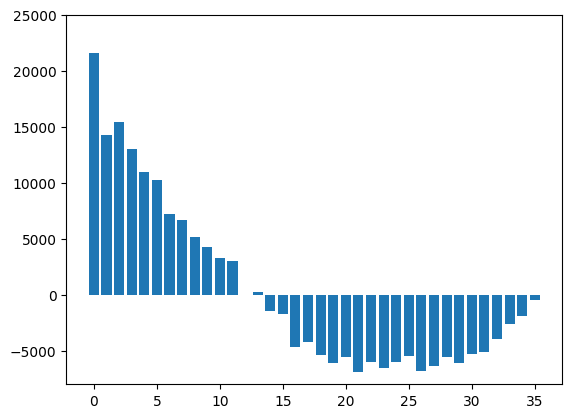

In [14]:
#econometrics5 pg 84
acovf = sm.tsa.acovf(data['Sales'])
idx = [x for x in range(len(acovf))]
plt.bar(idx, acovf)
plt.ylim(-8000, 25000)

(-8000.0, 25000.0)

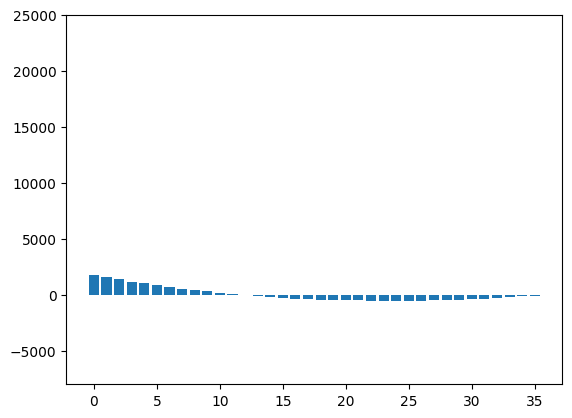

In [15]:
acovf2 = sm.tsa.acovf(data['S(0.05)'])
idx = [x for x in range(len(acovf2))]
plt.bar(idx, acovf2)
plt.ylim(-8000, 25000)

In [16]:
#auto correlation function
sm.tsa.acf(data['Sales'])

array([ 1.        ,  0.66255777,  0.7165448 ,  0.60323689,  0.50618008,
        0.47474817,  0.33604178,  0.3101703 ,  0.23757292,  0.19586055,
        0.1518714 ,  0.13957659, -0.00304812,  0.01174439, -0.06558828,
       -0.07950614])

<BarContainer object of 16 artists>

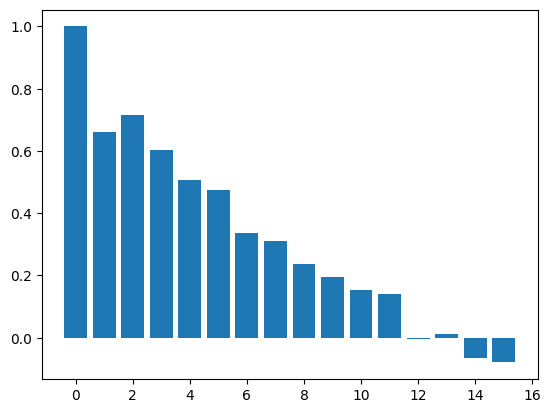

In [17]:
acf = sm.tsa.acf(data['Sales'])
idx = [x for x in range(len(acf))]
plt.bar(idx, acf)

<BarContainer object of 16 artists>

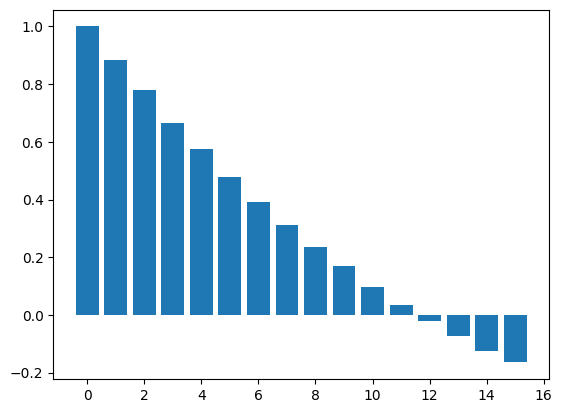

In [18]:
acf2 = sm.tsa.acf(data['S(0.05)'])
plt.bar(range(len(acf2)), acf2)

econometrics5 pg.85 <br>
'시계열의 종속성'이라는 성질은 예측을 위해 필수적이지만 너무 심하면 패턴 추정량/예측치의 신뢰성down <br>
따라서 안정적 시계열을 통해 시계열 종속성 가지고 패턴은 찾되 예측치/추정량의 신뢰성 확보 <br>
but, 대부분 시계열은 불안정 시계열임 -> 안정화 후 분석

# 시계열자료의 안정성 확보: MA

In [19]:
#econometrics5 pg 86
#단순이동평균법은 일정기간의 표본경로의 평균값을 예측치로 사용함으로 시계열의 불안정성 해소
#주로 계절변동 완화에 활용됨
#이동평균법은 n(이동평균의 개수)의 크기에 따라 결과가 달라짐
###n이 클수록 자료의 안정성up, 그러나 자료의 추세가 완화되어 추세가 있는 경우 예측정확도down
#또한 처음 n개의 예측값은 구할 수 없음

이동평균 "모형"이랑 이동평균"법"이랑 다름 (econometrics5 pg 86은 이동평균법)

이동평균법은 시계열 자료의 안정성 확보를 위함 (자료의 불안정성 해소) </br>
for stationarity

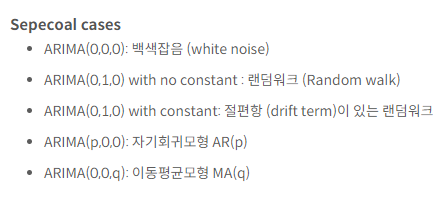

In [20]:
from IPython.display import Image
Image('arima.png')

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
data = pd.read_csv('sales.csv')

In [22]:
data

,sales
0,60
1,225
2,168
3,7
4,52
5,32
6,11
7,9
8,148
9,160


In [23]:
#MA(4)
ma_model = ARIMA(data.sales, order = (0,0,4)).fit()
ma_model.summary()

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   20
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -110.559
Date:                Mon, 28 Nov 2022   AIC                            233.118
Time:                        09:29:23   BIC                            239.092
Sample:                             0   HQIC                           234.284
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.1548      6.700     13.158      0.000      75.023     101.286
ma.L1         -0.1324   2.92e+04  -4.53e-06      1.000   -5.73e+04    5.73e+04
ma.L2         -0.0002   3996.386  -4.63e-08      1.000   -7832.774    7832.773
ma.L3          0.1324   2.92e+04   4.53e-06      1.000   -5.73e+04    5.73e+04
ma.L4         -0.9998      0.443     -2.258      0.024      -1.868      -0.132
sigma2      2590.5608     16.247    159.451      0.000    2558.718    2622.404
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.63   Prob(JB):                         0.74
Heteroskedasticity (H):               0.49   Skew:                             0.20
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.9e+22. Standard errors may be unstable.
"""

In [24]:
ma_model.predict()

0      88.154769
1      91.818628
2      70.615633
3      72.939227
4     115.148868
5      35.844227
6      35.952462
7     116.788850
8     139.470303
9      86.929706
10     85.005811
11    165.160432
12     78.141205
13     38.930332
14    111.213495
15      4.073919
16    127.572497
17     68.760302
18    113.212923
19     61.675478
Name: predicted_mean, dtype: float64

여기부터가 이동평균법 적용 (econometrics5 pg.86 예제 참고)

y1~y5를 이용해 y6을 예측할 경우: <br>
M5 = y6_hat = 1/5(y1+y2+...+y5) => MA(5)

Simple Moving Average <br>
단순이동평균법은 일정기간의 표본경로의 평균값을 예측치로 사용함으로 시계열의 불안정성을 해소 <br>
주로 계절변동 완화에 활용됨<br><br>
n(이동평균 개수)의 크기에 따라 결과가 달라짐<br>
- n이 클수록 자료의 안정성up, 그러나 자료의 추세가 완화되어 추세가 있는 경우 예측의 정확도down<br>
- 처음 n개의 예측값은 구할 수 없음

In [25]:
data

,sales
0,60
1,225
2,168
3,7
4,52
5,32
6,11
7,9
8,148
9,160


In [26]:
data['ma(4)'] = data.sales.rolling(4).mean()

In [27]:
import numpy as np
data['yhat(4)'] = pd.Series(np.nan).append(data.sales.rolling(4).mean()).drop(index=\
    data.sales.index[-1]).reset_index(drop=True)

C:\Users\SH\AppData\Local\Temp\ipykernel_12508\778470686.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data['yhat(4)'] = pd.Series(np.nan).append(data.sales.rolling(4).mean()).drop(index=\


In [28]:
data

,sales,ma(4),yhat(4)
0,60,NaN,NaN
1,225,NaN,NaN
2,168,NaN,NaN
3,7,115.00,NaN
4,52,113.00,115.00
5,32,64.75,113.00
6,11,25.50,64.75
7,9,26.00,25.50
8,148,50.00,26.00
9,160,82.00,50.00


In [29]:
data['ma(5)'] = data.sales.rolling(5).mean()

In [30]:
data['yhat(5)'] = pd.Series(np.nan).append(
    data.sales.rolling(5).mean()).drop(index=data.sales.index[-1]).reset_index(drop=True)

C:\Users\SH\AppData\Local\Temp\ipykernel_12508\2281373561.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data['yhat(5)'] = pd.Series(np.nan).append(


In [31]:
data

,sales,ma(4),yhat(4),ma(5),yhat(5)
0,60,NaN,NaN,NaN,NaN
1,225,NaN,NaN,NaN,NaN
2,168,NaN,NaN,NaN,NaN
3,7,115.00,NaN,NaN,NaN
4,52,113.00,115.00,102.4,NaN
5,32,64.75,113.00,96.8,102.4
6,11,25.50,64.75,54.0,96.8
7,9,26.00,25.50,22.2,54.0
8,148,50.00,26.00,50.4,22.2
9,160,82.00,50.00,72.0,50.4


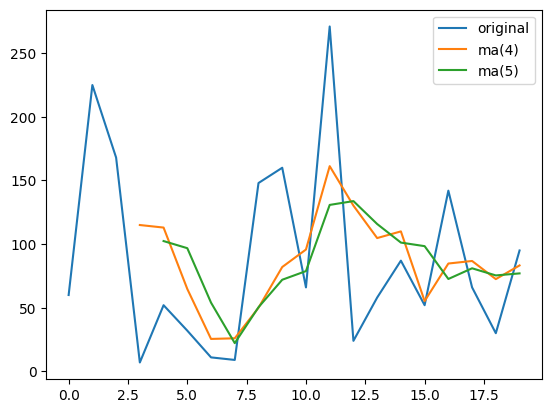

In [32]:
idx = data.index
import matplotlib.pyplot as plt
plt.plot(idx, data.sales, label='original')
plt.plot(idx, data['ma(4)'], label='ma(4)')
plt.plot(idx, data['ma(5)'], label='ma(5)')
plt.legend()
plt.show()

In [33]:
#가중이동평균법(Weighted Moving Average)은 weight따라 그냥 계산하면 되니까 패스
#가중이동평균법의 경우 등락폭이 SMA보다는 큼 (큰 값에 대한 가중치가 더 크게 들어갈 수 있으므로 값이 클 때는 크고 작을 땐 작음)

# 시계열 자료의 안정성 확보: 지수평활화

In [34]:
#econometrics5 pg. 88

#이동평균법의 한계: 최근 자료와 과거자료에 대한 가중치가 동일하게 적용됨
# 지수평활법의 경우 과거 자료와 예측치의 가중평균으로 계산되며, 과거 예측치의 경우 최근 자료에 대한 정보가 더 많이 포함됨

In [35]:
#econometrics5 pg. 88
import pandas as pd
data = pd.read_csv('sales.csv')

In [36]:
# 평활계수 alpha(smoothing_level)가 클수록 최근자료 가중치가 큼 (일반적으로 0.05~0.3 사이 값을 적용)
# 초기값(initial level)은 초기값 이전 평균값 또는 초기 N개의 이동평균값을 적용
# alpha를 작게 설정할수록 안정성은 up, 변동성은 down
# S0은 초기값으로 초기값 이전 평균값 또는 초기 N개의 이동평균값을 적용
# 시계열자료 안정성 확보가 목적이라면 지수평활법이 더 적합 (MA에 비해)
# alpha가 클수록 최근자료 가중치 큼

In [37]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [38]:
fit1 = SimpleExpSmoothing(endog=data.sales, initial_level=80, initialization_method='known').fit(smoothing_level=0.1, optimized=False)

In [39]:
data['S(0.1)'] = pd.Series(round(fit1.predict(1, 20),1)).reset_index(drop=True)

In [40]:
data

,sales,S(0.1)
0,60,78.0
1,225,92.7
2,168,100.2
3,7,90.9
4,52,87.0
5,32,81.5
6,11,74.5
7,9,67.9
8,148,75.9
9,160,84.3


In [41]:
fit2 = SimpleExpSmoothing(endog=data.sales, initialization_method='known', initial_level=80).fit(smoothing_level=0.2, optimized=False)
data['S(0.2)'] = pd.Series( round(fit2.predict(1,20),2) ).reset_index(drop=True)

In [42]:
data
#econometrics5 pg.88의 예제 (!!!공책의 예제 S(0.2)부분 계산이 잘못되었음. 아래가 맞는 계산임)

,sales,S(0.1),S(0.2)
0,60,78.0,76.00
1,225,92.7,105.80
2,168,100.2,118.24
3,7,90.9,95.99
4,52,87.0,87.19
5,32,81.5,76.15
6,11,74.5,63.12
7,9,67.9,52.30
8,148,75.9,71.44
9,160,84.3,89.15


In [43]:
# S_t = aY_t + (1-a)S_t-1
0.2*60 + 0.8*80

76.0

In [44]:
0.2*225 + 0.8*76

105.80000000000001

In [45]:
0.2*168 + 0.8*105.8

118.24000000000001

In [46]:
data

,sales,S(0.1),S(0.2)
0,60,78.0,76.00
1,225,92.7,105.80
2,168,100.2,118.24
3,7,90.9,95.99
4,52,87.0,87.19
5,32,81.5,76.15
6,11,74.5,63.12
7,9,67.9,52.30
8,148,75.9,71.44
9,160,84.3,89.15


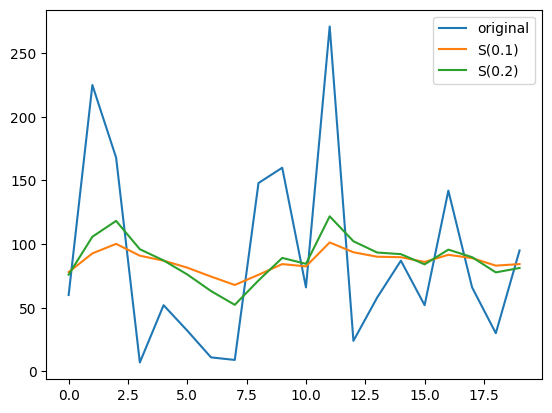

In [47]:
#alpha를 작게 설정할수록 안정성up
#시계열자료 안정성 확보가 목적이라면 지수평활법이 MA보다 더 적합
import matplotlib.pyplot as plt
plt.plot(data.index, data.sales, label='original')
plt.plot(data.index, data['S(0.1)'], label='S(0.1)')
plt.plot(data.index, data['S(0.2)'], label='S(0.2)')
plt.legend()
plt.show()

이중 지수평활화

In [48]:
#단순 지수평활화 값을 다시 지수평활화
# 단순 지수평활화 값보다 자료의 안정성 up
# 이 경우 단순지수평활화를 위한 초기값(S0)과 평활계수(alpha), 이중 지수평활화를 위한 초기값(S0')과 평활계수(beta) 필요
#이중지수평활화의 경우 자료의 변화폭을 거의 없앰
#이중지수평활은 (증가)추세가 있는 자료의 경우 더 예측이 적합하게 됨

In [49]:
data

,sales,S(0.1),S(0.2)
0,60,78.0,76.00
1,225,92.7,105.80
2,168,100.2,118.24
3,7,90.9,95.99
4,52,87.0,87.19
5,32,81.5,76.15
6,11,74.5,63.12
7,9,67.9,52.30
8,148,75.9,71.44
9,160,84.3,89.15


In [50]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [51]:
#S'0 = 70으로 설정한 경우
fit1 = SimpleExpSmoothing(data['S(0.1)'], initial_level=70, initialization_method='known').fit(smoothing_level=0.1, optimized=False)

In [52]:
data['S\'(0.1)'] = pd.Series(round(fit1.predict(1, 20),1)).reset_index(drop=True)

In [53]:
data

,sales,S(0.1),S(0.2),S'(0.1)
0,60,78.0,76.00,70.8
1,225,92.7,105.80,73.0
2,168,100.2,118.24,75.7
3,7,90.9,95.99,77.2
4,52,87.0,87.19,78.2
5,32,81.5,76.15,78.5
6,11,74.5,63.12,78.1
7,9,67.9,52.30,77.1
8,148,75.9,71.44,77.0
9,160,84.3,89.15,77.7


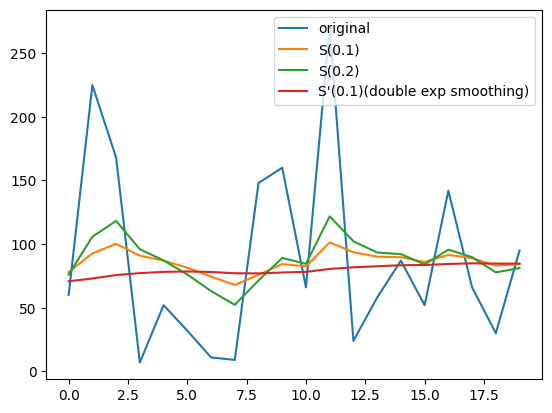

In [54]:
import matplotlib.pyplot as plt
plt.plot(data.index, data.sales, label='original')
plt.plot(data.index, data['S(0.1)'], label='S(0.1)')
plt.plot(data.index, data['S(0.2)'], label='S(0.2)')
plt.plot(data.index, data['S\'(0.1)'], label='S\'(0.1)(double exp smoothing)')
plt.legend()
plt.show()

In [55]:
#이중지수평활할 경우 단순 지수평활화 값보다 자료의 안정성 up
#이 경우 단순지수평활을 위한 초기값(S0)과 평활계수(alpha) + 이중지수평활화를 위한 초기값과 평활계수 필요
#이중지수평활의 경우 자료의 변화폭을 거의 없앰.
#이중지수평활은 (증가)추세가 있는 자료의 경우 더 예측이 적합하게 됨
#econometrics5 pg. 89

In [56]:
#alpha와 S0의 설정에 관하여: econometrics5 pg.90
# 예측오차가 가장 적은 alpha값을 설정하는 것도 alpha 설정의 한 방법
# S0은 MA로 설정하는 것도 하나의 방법
# 예를 들어 Y_11부터 시작하는 경우에는 y1~y10까지의 평균값을 S0으로 지정하는 것도 하나의 방법

In [57]:
data

,sales,S(0.1),S(0.2),S'(0.1)
0,60,78.0,76.00,70.8
1,225,92.7,105.80,73.0
2,168,100.2,118.24,75.7
3,7,90.9,95.99,77.2
4,52,87.0,87.19,78.2
5,32,81.5,76.15,78.5
6,11,74.5,63.12,78.1
7,9,67.9,52.30,77.1
8,148,75.9,71.44,77.0
9,160,84.3,89.15,77.7


econometrics5 pg.91~94 <br>
예측오차 (표본내오차, 표본외오차) <br>
MAE, MSE, RMSE, MPE, MAPE, MSPE, RMSPE, Theil's U

In [58]:
import pandas as pd
data = pd.read_csv('sales.csv')

In [59]:
data

,sales
0,60
1,225
2,168
3,7
4,52
5,32
6,11
7,9
8,148
9,160


In [60]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [61]:
len(data.sales)

20

In [62]:
len(data.sales[:10])

10

In [63]:
#표본내오차 (전체활용)
model_inner = SimpleExpSmoothing(data.sales, initial_level=80, initialization_method='known').fit(smoothing_level=0.2, optimized=False)

In [64]:
data['inner'] = pd.Series(round(model_inner.predict(1, 20),1)).reset_index(drop=True)

In [65]:
#표본외오차 (일부만 활용)
model_outer = SimpleExpSmoothing(data.sales[:10], initial_level=80, initialization_method='known').fit(smoothing_level=0.2, optimized=False)

In [66]:
data['outer'] = pd.Series(round(model_outer.predict(1, 20),1)).reset_index(drop=True)

In [67]:
data

,sales,inner,outer
0,60,76.0,76.0
1,225,105.8,105.8
2,168,118.2,118.2
3,7,96.0,96.0
4,52,87.2,87.2
5,32,76.2,76.2
6,11,63.1,63.1
7,9,52.3,52.3
8,148,71.4,71.4
9,160,89.2,89.2


In [68]:
# From the documentation:
# "Simple exponential smoothing has a “flat” forecast function.
# That is, all forecasts take the same value, equal to the last level component. Remember that these forecasts will only be suitable if the time series has no trend or seasonal component."
#https://stackoverflow.com/questions/61299128/why-does-exponential-smoothing-in-statsmodels-return-identical-values-for-a-time

In [69]:
from statsmodels.tools.eval_measures import mse, rmse, rmspe

In [70]:
print(mse(data.inner, data.sales))
print(mse(data.outer, data.sales))

3987.5939999999996
4529.743


In [71]:
print(rmse(data.sales, data.inner))
print(rmse(data.sales, data.outer))

63.14739899631655
67.30336544334169


In [72]:
print(rmspe(y=data.sales[10:20], y_hat=data.inner[10:20]))
print(rmspe(y=data.sales[10:20], y_hat=data.outer[10:20]))
print(rmspe(y=data.sales, y_hat=data.sales))

12.073807475177773
11.36453083830498
0.0


In [73]:
data.iloc[10:20, :]

,sales,inner,outer
10,66,84.5,89.2
11,271,121.8,89.2
12,24,102.3,89.2
13,58,93.4,89.2
14,87,92.1,89.2
15,52,84.1,89.2
16,142,95.7,89.2
17,66,89.7,89.2
18,30,77.8,89.2
19,95,81.2,89.2


In [74]:
data['test'] = pd.Series([50, 200, 140, 20, 30, 40, 20, 10, 130, 140, 55, 250, 10, 40, 70, 32, 100, 40, 20, 75])

In [75]:
print(rmspe(y=data.sales[10:20], y_hat=data.inner[10:20]))
print(rmspe(y=data.sales[10:20], y_hat=data.outer[10:20]))
print(rmspe(y=data.sales, y_hat=data.test))
print(rmspe(y=data.sales, y_hat=data.sales))

12.073807475177773
11.36453083830498
2.23606797749979
0.0
